<a href="https://colab.research.google.com/github/bhargav23/AI/blob/master/Lab/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data visualization
* Data visualization allows us to quickly interpret the data and adjust different variables to see their effect
* Why visualize data?
  * Observe the patterns
  * Identify extreme values that could be anomalies
  * Easy interpretation
* We will learn how to create basic plots using matplotlib library
  * Scatter plot
  * Histogram
  * Bar plot

### Matplotlib
* Matplotlib is a 2 D plotting library which produces good quality figures
* Although it has its origins in emulating the MATLAB graphics commands, it is independent of MATLAB
* It makes heavy use of NumPy and other extension code to provide good performance even for large arrays

### Scatter Plot
* What is a scatter plot?
	* A scatter plot is a set of points that represents the values obtained for two different variables plotted on a horizontal and vertical axes
* When to use scatter plots?
 * Scatter plots are used to convey the relationship between two numerical variables
 * Scatter plots are sometimes called correlation plots because they show how two variables are correlated



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/bhargav23/Dataset/master/Toyota.csv',index_col=0,na_values=['??','????'])

In [0]:
df.dropna(axis=0,inplace=True)

In [4]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170


* The price of the car decreases as age of the car increases

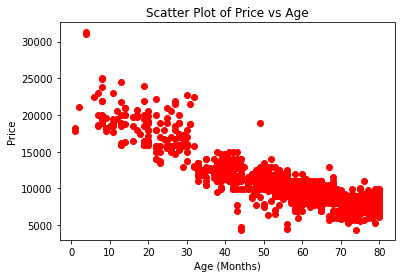

In [5]:
plt.scatter(df['Age'],df['Price'],c='Red')
plt.title("Scatter Plot of Price vs Age")
plt.xlabel("Age (Months)")
plt.ylabel("Price")
plt.show()

### Histogram
* What is a histogram?
 * It is a graphical representation of data using bars of different heights
 * Histogram groups numbers into ranges and the height of each bar depicts the frequency of each range or bin
* When to use histograms?
 * To represent the frequency distribution of numerical variables

(array([ 92., 239., 331., 222., 111.,  51.,  25.,  13.,  10.,   2.]),
 array([1.000000e+00, 2.430090e+04, 4.860080e+04, 7.290070e+04,
        9.720060e+04, 1.215005e+05, 1.458004e+05, 1.701003e+05,
        1.944002e+05, 2.187001e+05, 2.430000e+05]),
 <a list of 10 Patch objects>)

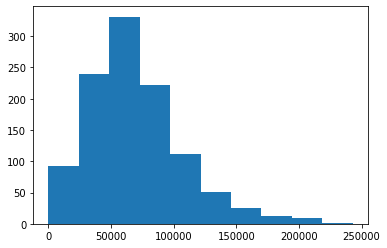

In [6]:
plt.hist(df['KM']) # Histogram with default arguments

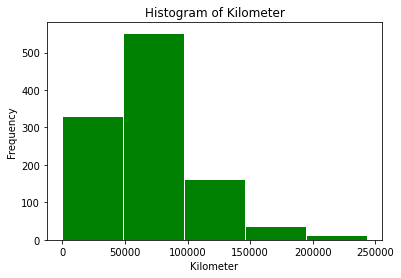

In [7]:
plt.hist(df['KM'], color = 'green', edgecolor = 'white', bins = 5) 
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

* Frequency distribution of kilometre of the cars shows that most of the cars have travelled between 50000 100000 km and there are only few cars with more distance travelled

### Bar plot
* What is a bar plot?
 * A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the counts that they represent 
* When to use bar plot?
 * To represent the frequency distribution of categorical variables 
 * A bar diagram makes it easy to compare sets of data between different groups

In [9]:
pd.crosstab(index=df['FuelType'],columns='count')

col_0,count
FuelType,
CNG,12
Diesel,116
Petrol,968


In [0]:
c = pd.crosstab(index=df['FuelType'],columns='count')

In [0]:
count = dict(c['count'])

In [12]:
count

{'CNG': 12, 'Diesel': 116, 'Petrol': 968}

In [0]:
fuelType = count.keys()

In [14]:
fuelType

dict_keys(['CNG', 'Diesel', 'Petrol'])

In [0]:
counts = count.values()

In [16]:
counts

dict_values([12, 116, 968])

In [0]:
index = np.arange(len(fuelType))

In [18]:
index

array([0, 1, 2])

* Frequency distribution of fuel type

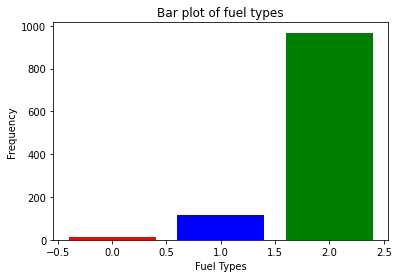

In [19]:
plt.bar(index, counts, color=['red', 'blue', 'green']) 
plt.title('Bar plot of fuel types') 
plt.xlabel('Fuel Types') 
plt.ylabel('Frequency') 
plt.show() 


* Bar plot of fuel type shows that most of the cars have petrol as
fuel type

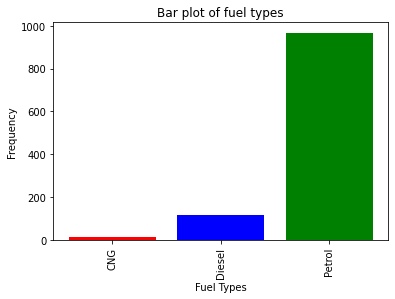

In [21]:
plt.bar(index, counts, color=['red', 'blue', 'green']) 
plt.title('Bar plot of fuel types') 
plt.xlabel('Fuel Types') 
plt.ylabel('Frequency') 
plt.xticks(index,fuelType,rotation=90)
plt.show() 


### Summary
* We have learnt how to create basic plots using matplotlib library
 * Scatter plot
 * Histogram
 * Bar plot

### In this lecture
* We will learn how to create basic plots using seaborn library
 * Scatter plot
 * Histogram
 * Bar plot
 * Box and whiskers plot
 * Pairwise plots

### Seaborn
* Seaborn is a Python data visualization library based on matplotlib
* It provides a high level interface for drawing attractive and informative statistical graphics


In [22]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Scatter plot
* 
Scatter plot of Price vs Age with default arguments

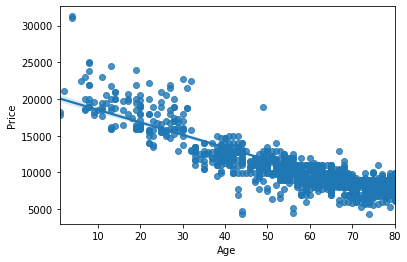

In [24]:
sns.regplot(x = df['Age'],y=df['Price'])

* By default, **fit_reg = True**
* It estimates and plots a regression model relating the x and y variables

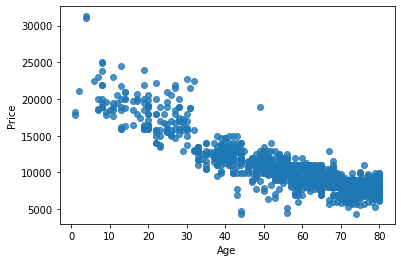

In [19]:
sns.regplot(x = df['Age'],y=df['Price'],fit_reg=False)

* Scatter plot of Price vs Age by customizing the appearance of **markers**

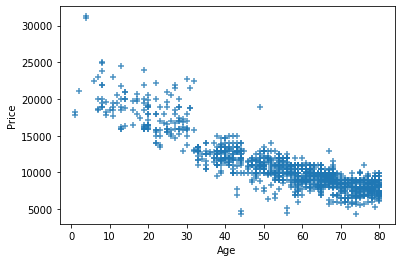

In [25]:
sns.regplot(x = df['Age'],y=df['Price'],fit_reg=False,marker="+") #default value for marker is 'o'

* Scatter plot of **Price vs Age by FuelType**
* Using hue parameter, including another variable to show the fuel types categories with different colors

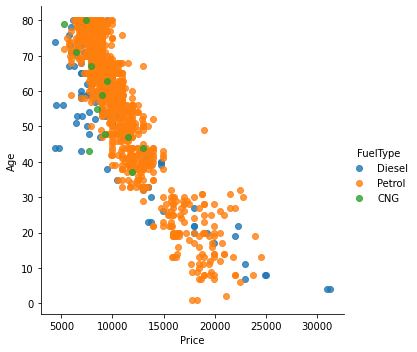

In [27]:
sns.lmplot(x='Price', y='Age', data = df ,hue = 'FuelType',fit_reg=False)

### Histogram
* Histogram with default kernel density estimate

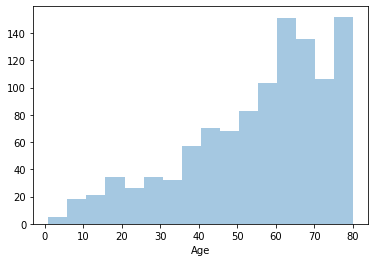

In [28]:
sns.distplot(df['Age'],kde=False)

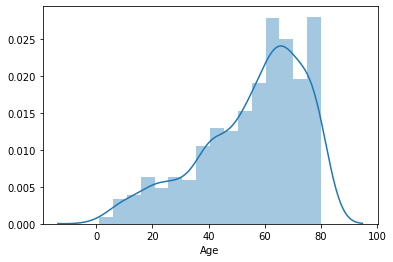

In [29]:
sns.distplot(df['Age'],kde=True)

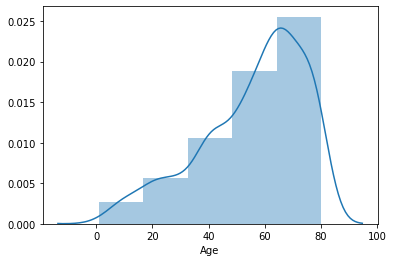

In [30]:
sns.distplot(df['Age'],kde=True,bins=5)

### Bar plot
* Frequency distribution of fuel type of the cars

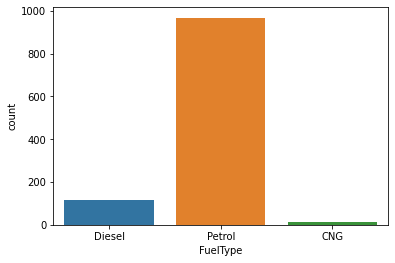

In [31]:
sns.countplot(x='FuelType',data=df)

### Grouped bar plot
* Grouped bar plot of FuelType and Automatic

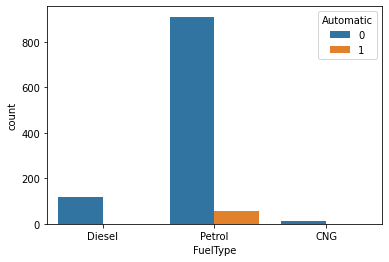

In [32]:
sns.countplot(x='FuelType',data=df,hue='Automatic')

### Box and whiskers plot - numerical variable
* A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. 
* The five-number summary is the minimum, first quartile, median, third quartile, and maximum.
* Box and whiskers plot of **Price** to visually interpret the five number summary

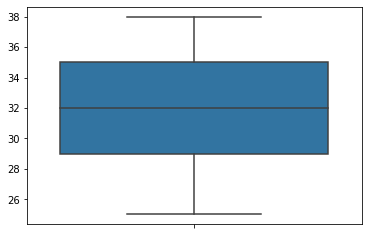

In [34]:
sns.boxplot(y=[25, 28, 29, 29, 30, 34, 35, 35, 37, 38])
 # minimum = 25, first quartile, median = (30 + 34) /2, third quartile, and maximum = 38
 # first quartile = 25, 28, 29, 29, 30 -- median = 29 
 # third quartile = 34, 35, 35, 37, 38 -- median = 35

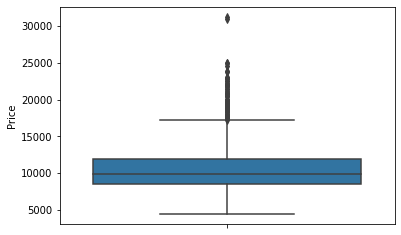

In [35]:
sns.boxplot(y=df['Price'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


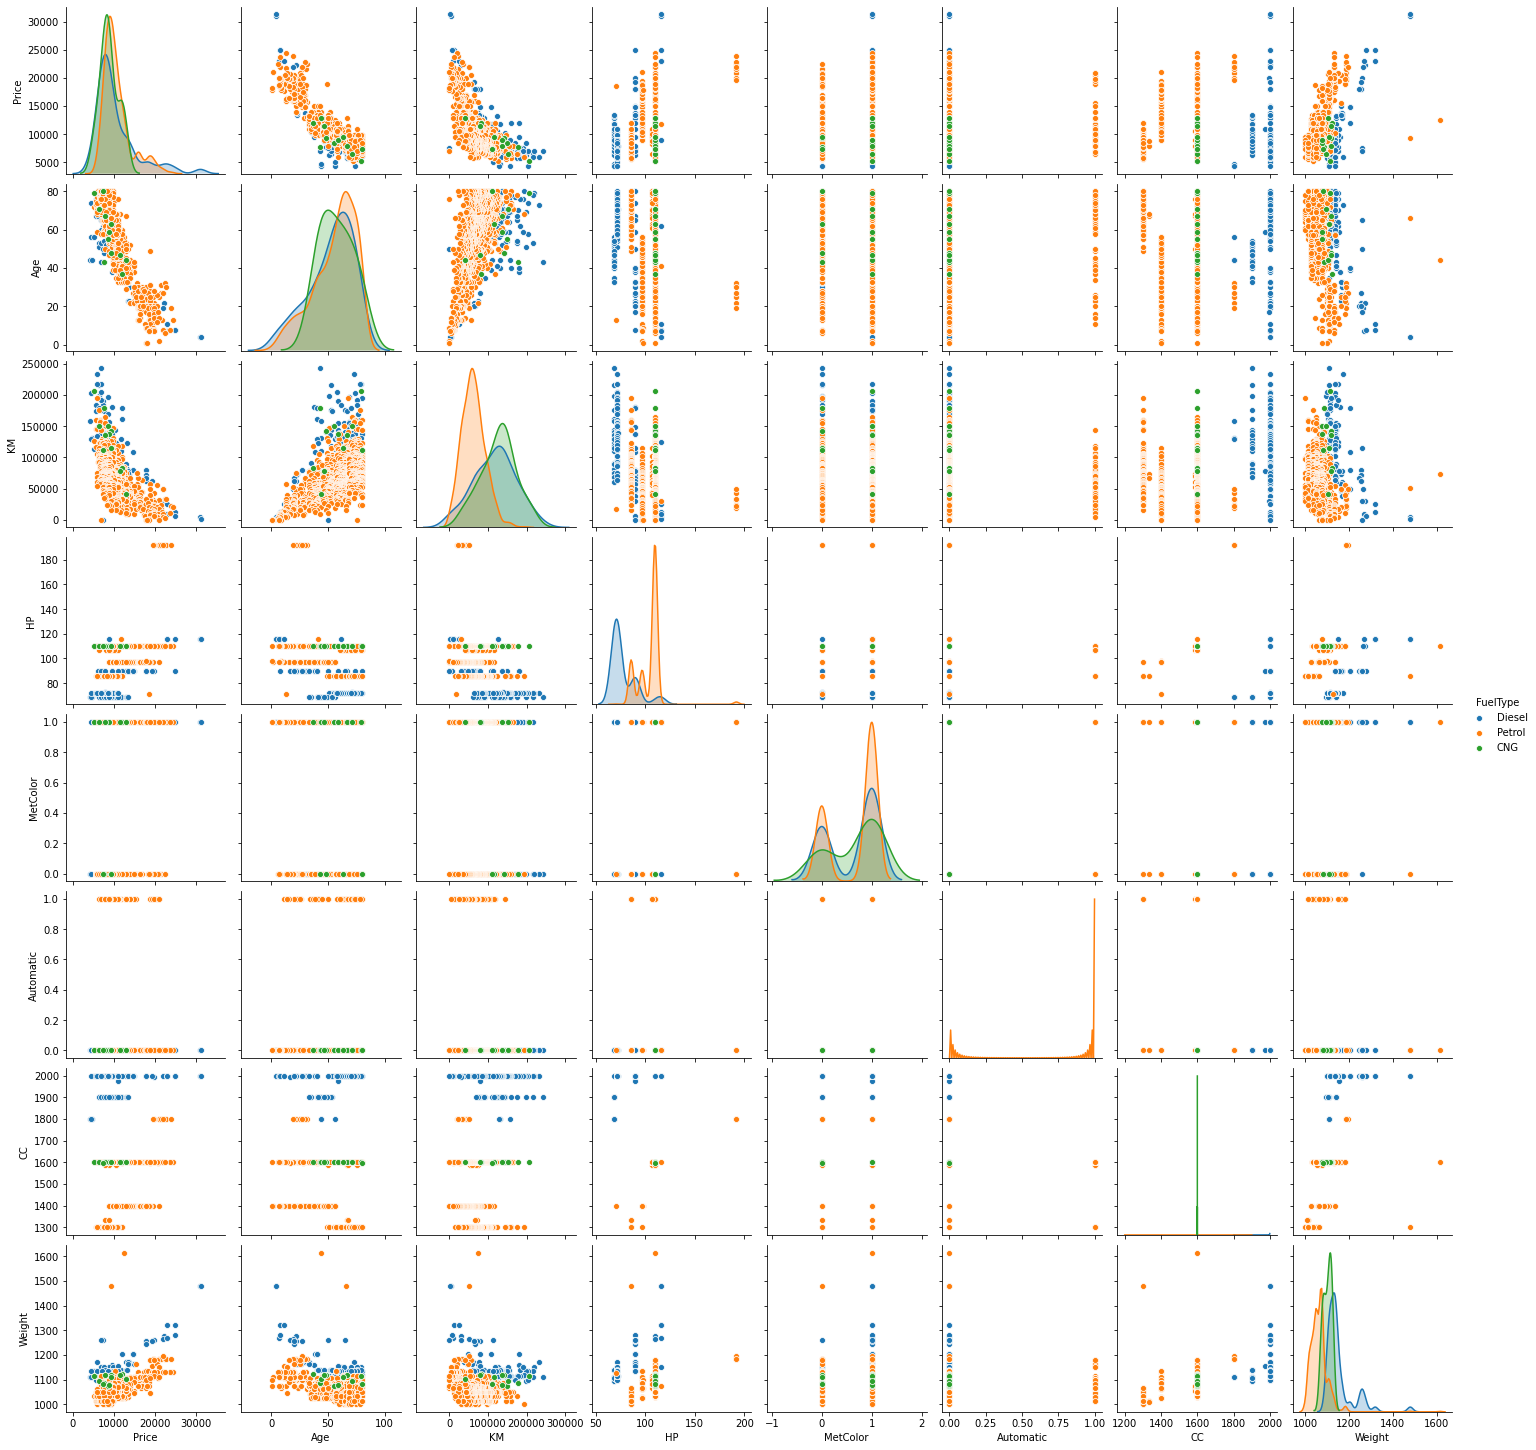

In [36]:
sns.pairplot(df , kind="scatter", hue = 'FuelType')
plt.show()